In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [4]:
# from HFC32_emimTf2N_PR import configuration
from HFC125_hmimCl_PR import configuration

In [6]:
#need to make excel csv for 125
data = pd.read_csv('R125_hmimCl.csv')
print(data)

   temperature  pressure  x_R125  x_hmimCl
0       298.15     50000   0.040     0.960
1       298.15    100000   0.079     0.921
2       298.15    200000   0.160     0.840
3       298.15    400000   0.290     0.710
4       298.15    600000   0.414     0.586
5       298.15    800000   0.543     0.457
6       298.15   1000000   0.654     0.346


In [7]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-13 14:12:07 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [17]:
binary_params_peng(data, configuration, 'R125', 'hmimCl', "x_R125", "x_hmimCl", 
    init_temp =  298.15, init_press =   50000 , init_x_c1 =    0.040, init_x_c2 = 0.960,
    init_kappa_2_1 = -0.05, init_kappa_1_2 = -0.05, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-13 15:12:58 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-13 15:12:59 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-13 15:12:59 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-13 15:12:59 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-13 15:12:59 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-13 15:12:59 [INFO] idaes.init.fs.state_

In [19]:
k12 = -0.03257786195335202
k21 = -0.06369090304855396

In [20]:
R125_x,P= calc_outlet_xP(data,m,"R125", "hmimCl", k21, k12,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


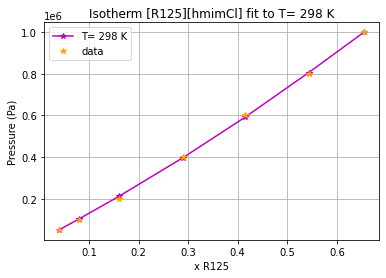

In [22]:
plt.plot(R125_x,P,"m*-",label="T= 298 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][hmimCl] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
# plt.ylim(0,1300000)
plt.legend()
plt.show()